# Air Quality Index Prediction

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rcParams

## Reading The Dataset

In [2]:
df = pd.read_csv('Data/Data.csv')

df.sample(5)

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
261,34.6,42.8,25.0,999.6,46.0,1.8,6.3,18.3,143.375000
767,24.3,29.0,15.6,1011.7,56.0,1.9,10.0,18.3,76.541667
866,31.4,35.2,26.0,1005.8,62.0,3.1,2.0,7.6,48.916667
1025,33.4,36.5,28.6,999.9,66.0,2.9,9.8,16.5,31.916667
599,33.4,39.1,24.8,1008.0,47.0,2.1,2.6,7.6,25.750000


In [3]:
print("df.shape : ", df.shape)

df.shape :  (1093, 9)


In [4]:
print(df.columns)

Index(['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5'], dtype='object')


- **T**  	  Average Temperature (°C)            
- **TM**	  Maximum temperature (°C)             
- **Tm**	  Minimum temperature (°C)                 
- **SLP**	  Atmospheric pressure at sea level (hPa)          
- **H**	  Average relative humidity (%)           
- **PP**	  Total rainfall and / or snowmelt (mm)          
- **VV**    Average visibility (Km)           
- **V**	  Average wind speed (Km/h)               
- **VM**    Maximum sustained wind speed (Km/h)            

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093 entries, 0 to 1092
Data columns (total 9 columns):
T         1093 non-null float64
TM        1093 non-null float64
Tm        1093 non-null float64
SLP       1093 non-null float64
H         1093 non-null float64
VV        1093 non-null float64
V         1093 non-null float64
VM        1093 non-null float64
PM 2.5    1092 non-null float64
dtypes: float64(9)
memory usage: 77.0 KB


In [6]:
df[df['PM 2.5'].isnull()]

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
184,14.3,19.2,10.9,1020.5,91.0,1.6,4.8,11.1,NaN


In [7]:
df.fillna(method='ffill', inplace = True)

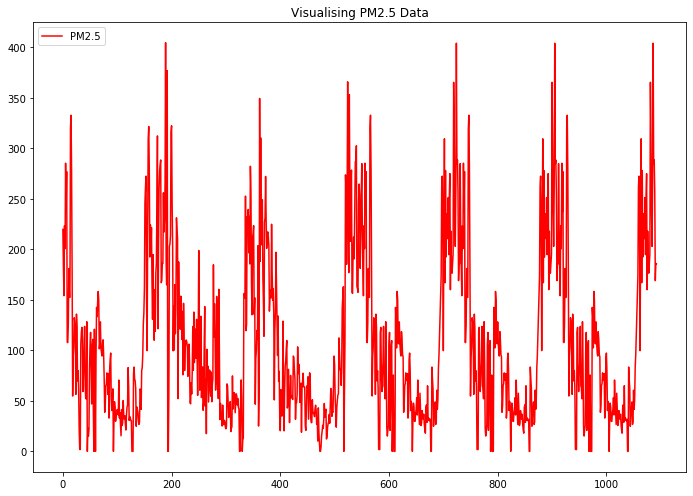

In [8]:
# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27

# Visualising the PM 2.5 Values

sns.lineplot(data = df["PM 2.5"], color="red", label="PM2.5")
plt.title('Visualising PM2.5 Data')
plt.show()

**There seems to be some repetiotions in the dataset after index 700, so lets check for duplicates in the dataset and remove them if any**

In [9]:
# Select duplicate rows except first occurrence based on all columns
duplicateRowsDF = df[df.duplicated()]
 
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)

Duplicate Rows except first occurrence based on all columns are :
         T    TM    Tm     SLP     H   VV     V    VM      PM 2.5
731   16.9  25.1   6.6  1021.3  65.0  1.1   2.0   7.6  284.795833
732   15.5  24.1   7.7  1021.0  71.0  1.1   3.5  11.1  219.720833
733   14.9  22.8   8.0  1018.4  73.0  1.1   5.9  13.0  182.187500
734   18.3  24.7  11.5  1018.1  85.0  0.5   1.1   7.6  154.037500
735   16.5  24.7  12.0  1017.4  82.0  0.6   8.0  13.0  223.208333
...    ...   ...   ...     ...   ...  ...   ...   ...         ...
1088  18.1  24.0  11.2  1015.4  56.0  1.8  15.9  25.9  288.416667
1089  17.8  25.0  10.7  1015.8  54.0  2.3   9.4  22.2  256.833333
1090  13.9  24.5  11.4  1015.0  95.0  0.6   8.7  14.8  169.000000
1091  16.3  23.0   9.8  1016.9  78.0  1.1   7.4  16.5  186.041667
1092  16.3  23.4   9.0  1017.3  68.0  1.3   7.8  18.3  185.583333

[362 rows x 9 columns]


**So, yeah, there were 362 duplicate enteries in the dataset !**          
I'll remove them from the dataset

In [10]:
df = df[df.duplicated() == False]

print(df.shape)

(731, 9)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 0 to 730
Data columns (total 9 columns):
T         731 non-null float64
TM        731 non-null float64
Tm        731 non-null float64
SLP       731 non-null float64
H         731 non-null float64
VV        731 non-null float64
V         731 non-null float64
VM        731 non-null float64
PM 2.5    731 non-null float64
dtypes: float64(9)
memory usage: 57.1 KB


All our features our numerical.

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
T,731.0,25.556908,7.286760,6.7,18.850000,27.700000,31.2000,38.5
TM,731.0,32.231874,6.852548,9.8,27.550000,34.100000,36.9000,45.5
Tm,731.0,19.273598,7.454202,0.0,12.000000,21.000000,25.9000,32.7
SLP,731.0,1008.196854,7.564601,991.5,1001.300000,1008.500000,1015.0000,1023.2
H,731.0,64.134063,15.460460,20.0,55.000000,66.000000,75.0000,98.0
VV,731.0,1.891929,0.686446,0.3,1.400000,1.900000,2.4000,5.8
V,731.0,6.630369,3.967064,0.4,3.500000,6.300000,9.1000,24.4
VM,731.0,15.696580,7.654019,1.9,11.100000,14.800000,18.3000,57.6
PM 2.5,731.0,108.036007,82.570588,0.0,43.583333,81.833333,154.0375,404.5


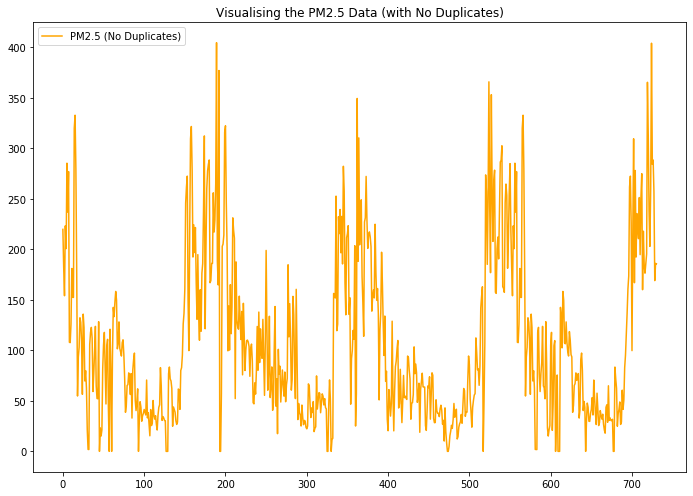

In [13]:
# Visualising the PM 2.5 Values

sns.lineplot(data = df["PM 2.5"], color="orange", label="PM2.5 (No Duplicates)")
plt.title('Visualising the PM2.5 Data (with No Duplicates)')
plt.show()

## EDA

In [14]:
pm_ = list(df['PM 2.5'])

Acceptable = []

for pm in pm_:
    if pm >= 151:
        Acceptable.append(0)
    else:
        Acceptable.append(1)

df['Acceptable'] = Acceptable

df.sample(3)

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5,Acceptable
660,30.9,35.0,26.0,997.4,73.0,2.6,6.5,11.1,28.375,1
238,27.7,34.5,21.5,1010.6,55.0,1.9,5.2,13.0,79.000,1
662,33.3,36.0,26.4,999.7,67.0,3.2,7.8,18.3,35.375,1


1    536
0    195
Name: Acceptable, dtype: int64


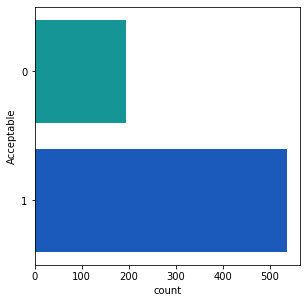

In [15]:
# figure size in inches
rcParams['figure.figsize'] = 4.75,4.75

print(df.Acceptable.value_counts())

sns.countplot(y = "Acceptable", data = df, palette = 'winter_r')
plt.show()

**Plot to see the relation between different climatical features and Acceptable PM2.5 lvls**

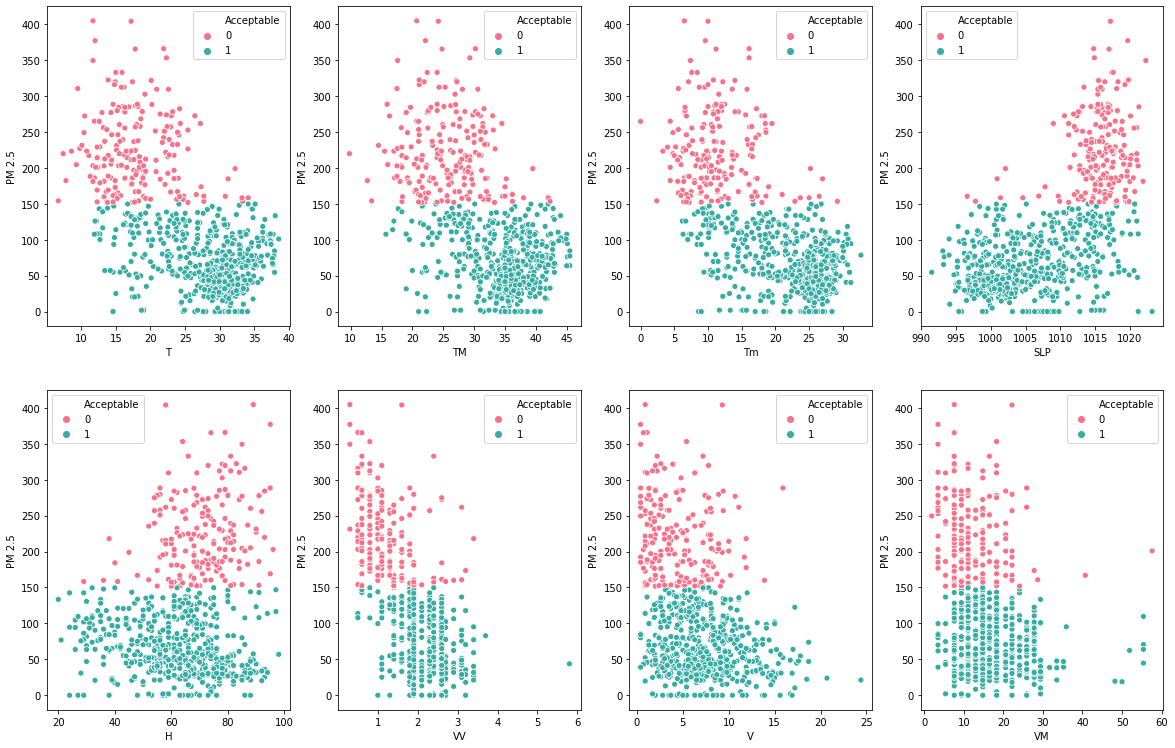

In [16]:
cols =  list(df.columns)

plt.figure(figsize=(20, 20))

for i in range(1, 9):
    plt.subplot(3, 4, i)
    sns.scatterplot(x = cols[i - 1], y = df['PM 2.5'],data = df, hue = "Acceptable", palette = "husl")

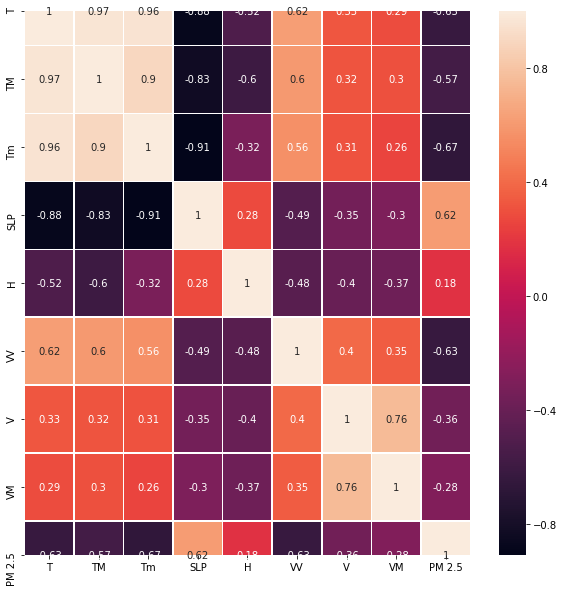

In [17]:
corrmat = df.corr()
top_corr_features = corrmat.index[:-1] # dropping 'Acceptable'

plt.figure(figsize=(10,10))

#plot heat map
sns.heatmap(df[top_corr_features].corr(),annot = True, linewidths=.5)
# print(corrmat)
plt.show()

In [18]:
from sklearn.model_selection import train_test_split

X = df[['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM']]
y = df['PM 2.5']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.10, random_state = 42)

In [19]:
print('Length of X_train', len(X_train))
print('Length of X_val', len(X_val))
print('Length of y_train', len(y_train))
print('Length of y_val', len(y_val))

Length of X_train 657
Length of X_val 74
Length of y_train 657
Length of y_val 74


### Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

print("lr.score : ", lr.score(X_val, y_val))
print("lr.coef_ : ",lr.coef_)
print("lr.intercept_ : ",lr.intercept_)

lr.score :  0.49337668046001937
lr.coef_ :  [ 1.90077649e+00  3.92929463e-02 -6.37936282e+00  4.71165649e-01
 -9.67942560e-01 -5.27430742e+01 -2.49218585e+00  2.09558903e-02]
lr.intercept_ :  -115.14163346023005


In [21]:
print("lr.score of training data: ", lr.score(X_train, y_train))

lr.score of training data:  0.5903625219690202


There seems to be overfitting as there is a 10% accuracy differnce in train n validation set

In [22]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(lr , X, y, cv = 5)

print(score)
print("Mean score : ",score.mean())

[0.51308156 0.48833908 0.64009098 0.5746025  0.11785428]
Mean score :  0.4667936792982824


#### Model Evaluation

In [23]:
coeff_df = pd.DataFrame(lr.coef_, X.columns, columns = ['Coefficient'])
coeff_df

,Coefficient
T,1.900776
TM,0.039293
Tm,-6.379363
SLP,0.471166
H,-0.967943
VV,-52.743074
V,-2.492186
VM,0.020956


#### Evaluation Metrics

In [24]:
from sklearn import metrics

prediction = lr.predict(X_val)

print('MAE:', metrics.mean_absolute_error(y_val, prediction))
print('MSE:', metrics.mean_squared_error(y_val, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_val, prediction)))

MAE: 37.29718684760129
MSE: 2512.67781830586
RMSE: 50.12661786222825


#### Saving the Model as pickle file

In [25]:
import pickle

# open a file, where you ant to store the data
file = open('linear_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(lr, file)